# Author: Babli Dey


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
torch.manual_seed(42)

# Question 1.	
Classification of XOR data (15 points) At first sight, it may seem as if separating the XOR data is a simple task.  However, due to the fact that the data is not linearly separable and that fitting the data requires non-trivial learning, the XOR problem has been a case study of interest on many topics related to training of feedforward networks.  In the 1960s, Minsky and Papert’s observations that perceptrons (neural network ancestors) were unable to fit the XOR data contributed to the rise of the first AI winter.  XOR data makes for such an interesting case study that papers describing learning properties of networks trained on it are still being published to this day. Create arrays containing the input data and the corresponding output labels for the XOR operator.  Recall that XOR takes as input two binary variables, and outputs a 0/1 if they have the same/different value.  Your XOR data should look like the following table:<br> ![image](xor.png) <br> In other words, the XOR training includes four, two-dimensional data samples with labels.  Create and train a network with at least three hidden layers that separates the XOR data, that is, a network that gets 100% performance on the four training samples above.  Monitor the accuracy on the training set as the training progresses.<br>

## Question (a) and (b)
a) Plot the decision boundaries of the earliest network in the training process that achieves 100% accuracy by plotting the network outputs in a densely sampled region around [-0.5,1.5]  [-0.5,1.5]. (5 points)<br>
b) Plot the decision boundaries of a network after the loss falls below 	$1 \times 10^{-4}$. (5 points)<br>

In [ ]:
XOR_data = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=np.float32)

XOR_labels = np.array([
    0,
    1,
    1,
    0
], dtype=np.float32).reshape(-1, 1)

# XOR input and output
X = torch.tensor(XOR_data, dtype=torch.float32)  # Input
y = torch.tensor(XOR_labels, dtype=torch.float32)  # Output labels

In [4]:
# neural network
class XORNet(nn.Module):
    def __init__(self, hidden_units=[8, 8, 8]):
        super(XORNet, self).__init__()
        self.hidden1 = nn.Linear(2, hidden_units[0])
        self.hidden2 = nn.Linear(hidden_units[0], hidden_units[1])
        self.hidden3 = nn.Linear(hidden_units[1], hidden_units[2])
        self.output = nn.Linear(hidden_units[2], 1)
        self.activation = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  # For binary classification
        
    def forward(self, x):
        x = self.activation(self.hidden1(x))
        x = self.activation(self.hidden2(x))
        x = self.activation(self.hidden3(x))
        x = self.sigmoid(self.output(x))
        return x

# Initialize the network, loss function, and optimizer
hidden_units = [8, 16, 32] 
model = XORNet(hidden_units)
model2 = XORNet(hidden_units)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.1)
optimizer2 = optim.Adam(model2.parameters(), lr=0.1)

In [ ]:
# Training loop with logging every 50 epochs
epochs = 2000
accuracy_history = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # accuracy
    with torch.no_grad():
        predictions = (y_pred >= 0.5).float()
        accuracy = (predictions == y).float().mean().item()
        accuracy_history.append(accuracy)
    
    if epoch % 50 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.6f} | Accuracy: {accuracy:.2f}")
    

    if accuracy == 1.00:
        first_model_accurate = model
        print(f"Epoch {epoch} | Loss: {loss.item():.6f} | Accuracy: {accuracy:.2f}")
        print('first model accuracy @ epoch',epoch)
        break


Epoch 0 | Loss: 0.694748 | Accuracy: 0.50
Epoch 6 | Loss: 0.633647 | Accuracy: 1.00
first model accuracy @ epoch 6


In [6]:
# Training loop to get loss below 1e-4
epochs = 5000
accuracy_history = []
loss_threshold = 1e-4
loss_below_threshold = False

for epoch in range(epochs):
    # Forward pass
    y_pred = model2(X)
    loss = criterion(y_pred, y)
    
    # Backward pass
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
    
    # Calculate accuracy
    with torch.no_grad():
        predictions = (y_pred >= 0.5).float()
        accuracy = (predictions == y).float().mean().item()
        accuracy_history.append(accuracy)
    
    # Log loss every 100 epochs
    if epoch % 50 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.6f} | Accuracy: {accuracy:.2f}")
    
    # Stop if the loss threshold is reached
    if loss.item() < loss_threshold and not loss_below_threshold:
        print(f"Loss fell below {loss_threshold:.1e} at epoch {epoch}")
        loss_below_threshold = True
        break


Epoch 0 | Loss: 0.701159 | Accuracy: 0.50
Loss fell below 1.0e-04 at epoch 13


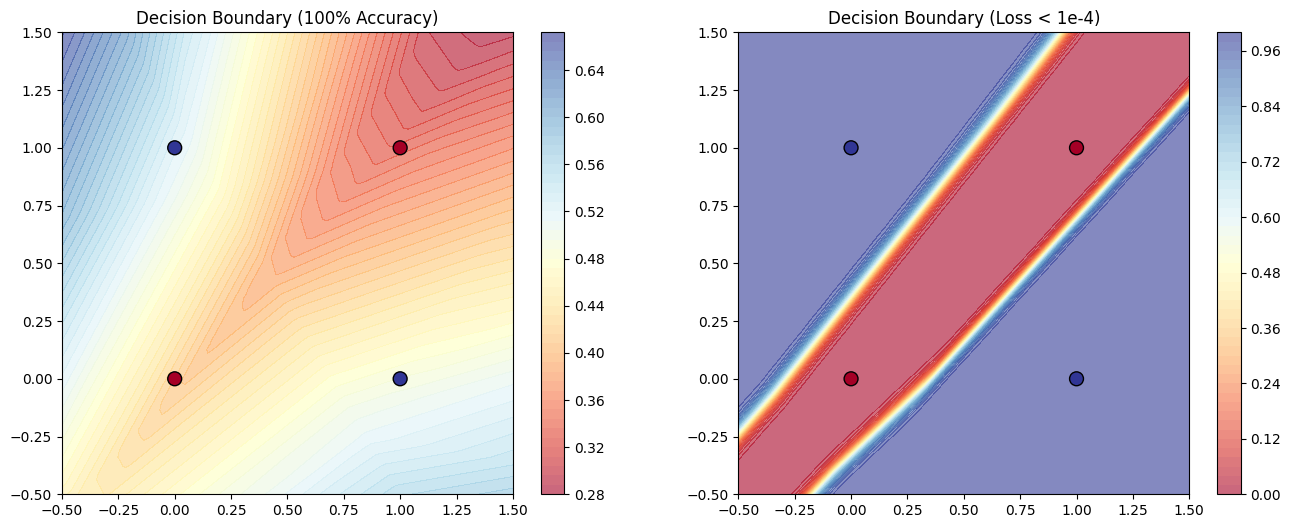

In [ ]:
def plot_decision_boundary(model, title, ax=None):
    # dense grid of points
    x1, x2 = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    grid = torch.tensor(np.c_[x1.ravel(), x2.ravel()], dtype=torch.float32)
    
    # Predict on the grid points
    with torch.no_grad():
        predictions = model(grid).reshape(x1.shape)
    
    # Plot decision boundary
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(x1, x2, predictions, levels=50, cmap='RdYlBu', alpha=0.6)
    plt.colorbar(contour, ax=ax)
    ax.scatter(X[:, 0], X[:, 1], c=y.squeeze(), edgecolor='k', cmap='RdYlBu', s=100)
    ax.set_title(title)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)

# Plot the decision boundaries
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# First 100% accuracy
plot_decision_boundary(model, "Decision Boundary (100% Accuracy)", ax=axs[0])

# After loss < 1e-4
plot_decision_boundary(model2, "Decision Boundary (Loss < 1e-4)", ax=axs[1])
plt.show()


## Question (c)	
Gradually decrease the capacity of the network above.  Find the smallest network that can still separate the data, i.e., find the least number of hidden layers and neurons that produces an accuracy of 1 on the training set? (5 points) [A portion of the total points is allocated to your rank amongst your peers in achieving the smallest network]

In [ ]:
def train_network(hidden_layers, hidden_neurons, epochs=5000, learning_rate=0.01, tol=1e-4):
    class XORNet(nn.Module):
        def __init__(self):
            super(XORNet, self).__init__()
            layers = []
            input_size = 2
            for _ in range(hidden_layers):
                layers.append(nn.Linear(input_size, hidden_neurons))
                layers.append(nn.ReLU())
                input_size = hidden_neurons
            layers.append(nn.Linear(input_size, 1))
            layers.append(nn.Sigmoid())
            self.model = nn.Sequential(*layers)
        
        def forward(self, x):
            return self.model(x)

    # Initialize the model, loss function, and optimizer
    model = XORNet()
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        # early stopping condition
        if loss.item() < tol:
            break

    # accuracy
    model.eval()
    with torch.no_grad():
        predictions = (model(X) >= 0.5).float()
        accuracy = (predictions == y).float().mean().item()

    return model, accuracy, loss.item(), epoch

In [ ]:
smallest_network = None
best_config = None

for hidden_layers in range(1, 4):  # Tests 1 to 3 hidden layers
    for hidden_neurons in range(1, 10):  # Tests 1 to 10 neurons per layer
        model, accuracy, final_loss, epoch = train_network(hidden_layers, hidden_neurons)
        if accuracy == 1.0:  # Perfect accuracy
            print(f"Hidden Layers: {hidden_layers}, Neurons per Layer: {hidden_neurons}, Loss: {final_loss:.6f}, Epochs: {epoch}")
            smallest_network = model
            best_config = (hidden_layers, hidden_neurons)
            break
    if best_config: 
        break

print(f"Smallest Network: {best_config[0]} hidden layer(s) with {best_config[1]} neuron(s) per layer")


Hidden Layers: 1, Neurons per Layer: 2, Loss: 0.000206, Epochs: 4999
Smallest Network: 1 hidden layer(s) with 2 neuron(s) per layer


<u>Insight for Question 1:</u><br>
Hidden layers: 3<br>
No. of neurons in each hidden layer: [layer 1: 8, layer 2: 16, layer 3: 32]<br>

Question c<br>
The least no. of neurons that produces an accuracy of 1 is:<br> Hidden Layers : 1, No. of neurons : 2

# Question (2a)	
File Feedforward_Data_ellipse.csv contains 13312 two-dimensional data points (feature values located in columns 1 and 2) and their respective binary label (labels located in column 3).  Create and train a network that separates the data.  Report your best loss and accuracy values.  Plot the decision boundaries of your best network by plotting the network outputs in a densely sampled region around [-1.0,1.0]  [-1.0,1.0].  Report the number of hidden layers, type of activation function and number of neurons per layer used.  (15 points). [A portion of the total points is allocated based on your rank amongst your peers in achieving the best loss and accuracy values]

In [11]:
df = pd.read_csv('FeedForward_Data_ellipse(1).csv', header = None)

In [12]:
df.head(5)

,0,1,2
0,0.008936,-0.292380,0
1,-0.009403,-0.281620,0
2,-0.620040,0.076616,1
3,0.555020,-0.612740,1
4,0.221360,-0.249130,0


In [13]:
# creating the featue and target in 
features = torch.tensor(df[[0,1]].values, dtype=torch.float32)
target = torch.tensor(df[2].values, dtype=torch.float32)

In [14]:
# Split into train and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)  # 70% train, 30% temp

# Split temp into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


/var/folders/rv/g2dxdl8d0cs8r1fdld2vzkxm0000gn/T/ipykernel_44922/1234466094.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
/var/folders/rv/g2dxdl8d0cs8r1fdld2vzkxm0000gn/T/ipykernel_44922/1234466094.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
/var/folders/rv/g2dxdl8d0cs8r1fdld2vzkxm0000gn/T/ipykernel_44922/1234466094.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.

In [15]:
# Create TensorDataset objects
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

In [16]:
# Define batch size
batch_size = 64

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# feedforward network
class FeedforwardNet(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(FeedforwardNet, self).__init__()
        layers = []
        in_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(in_size, hidden_size))
            layers.append(nn.ReLU())  # Activation function
            layers.append(nn.Dropout(p=dropout_prob))
            in_size = hidden_size
        layers.append(nn.Linear(in_size, output_size))
        layers.append(nn.Sigmoid())  # Final activation for binary classification
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)
    

# hyperparameters
input_size = 2
hidden_sizes = [256,512,256,128] 
output_size = 1
learning_rate = 1e-5
dropout_prob = 0.025

# Initialize the model, loss function, and optimizer
model = FeedforwardNet(input_size, hidden_sizes, output_size)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

Epoch [1/110], Train Loss: 0.6881, Val Loss: 0.6770
Epoch [2/110], Train Loss: 0.6608, Val Loss: 0.6330
Epoch [3/110], Train Loss: 0.6000, Val Loss: 0.5514
Epoch [4/110], Train Loss: 0.5063, Val Loss: 0.4447
Epoch [5/110], Train Loss: 0.4058, Val Loss: 0.3573
Epoch [6/110], Train Loss: 0.3347, Val Loss: 0.3009
Epoch [7/110], Train Loss: 0.2930, Val Loss: 0.2693
Epoch [8/110], Train Loss: 0.2681, Val Loss: 0.2493
Epoch [9/110], Train Loss: 0.2516, Val Loss: 0.2372
Epoch [10/110], Train Loss: 0.2397, Val Loss: 0.2291
Epoch [11/110], Train Loss: 0.2344, Val Loss: 0.2223
Epoch [12/110], Train Loss: 0.2285, Val Loss: 0.2198
Epoch [13/110], Train Loss: 0.2254, Val Loss: 0.2149
Epoch [14/110], Train Loss: 0.2225, Val Loss: 0.2127
Epoch [15/110], Train Loss: 0.2207, Val Loss: 0.2105
Epoch [16/110], Train Loss: 0.2192, Val Loss: 0.2099
Epoch [17/110], Train Loss: 0.2174, Val Loss: 0.2089
Epoch [18/110], Train Loss: 0.2155, Val Loss: 0.2086
Epoch [19/110], Train Loss: 0.2164, Val Loss: 0.2072
Ep

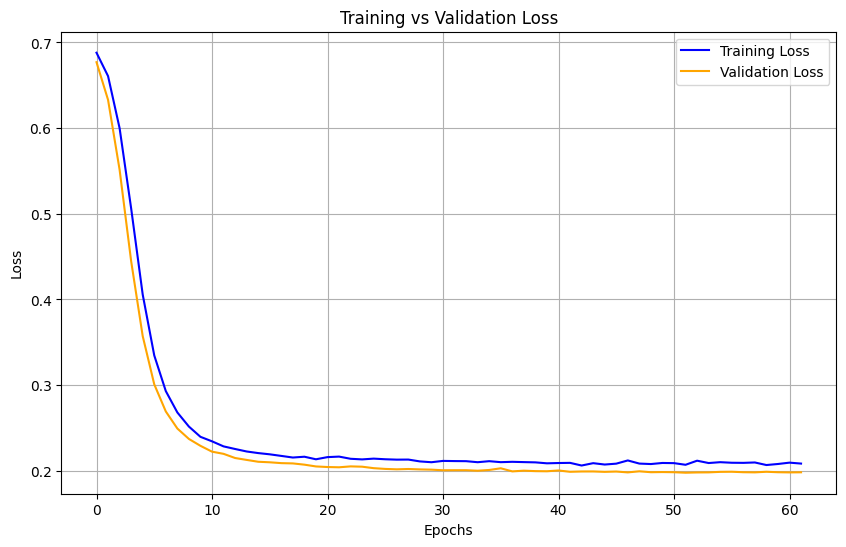

In [18]:

patience = 10
num_epochs = 110
best_val_loss = float('inf')
patience_counter = 0 

# Lists to store loss values for plotting
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()

    # Average losses
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)

    # Append losses to lists for plotting
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model  # Save the best model
        patience_counter = 0  # Reset patience counter
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch + 1}")
            break  # Stop training if patience is exceeded

    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# Evaluate on the test set
model.eval()
test_loss = 0.0
y_pred_list = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        test_loss += loss.item()
        y_pred_list.append((outputs >= 0.5).float())

test_loss /= len(test_loader)
y_pred = torch.cat(y_pred_list)
test_accuracy = accuracy_score(y_test.numpy(), y_pred.numpy())

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.1944, Test Accuracy: 0.9034


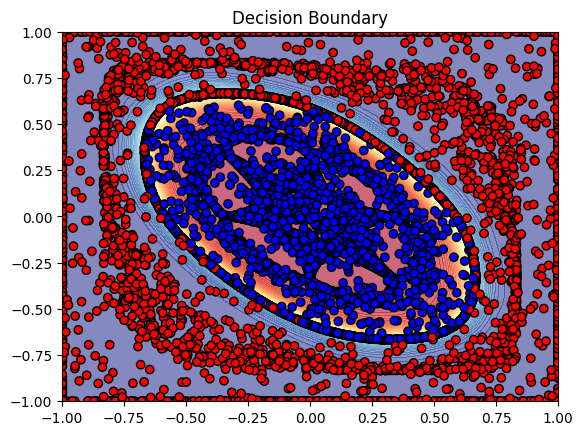

In [20]:
# Decision boundary visualization
def plot_decision_boundary(model, X, y):
    x_min, x_max = -1.0, 1.0
    y_min, y_max = -1.0, 1.0
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    with torch.no_grad():
        zz = model(grid_tensor)
    zz = zz.reshape(xx.shape).numpy()

    plt.contourf(xx, yy, zz, levels=50, cmap='RdYlBu', alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.title('Decision Boundary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(best_model, features, target)

<u>Insights for question 2a:</u><br>

My Best Loss was: 0.1944<br>
My Best accuracy: 0.9034<br>
No. of Hidden Layers: 4<br>
No. of Neurons per layers: [ layer 1:256,layer 2:512,layer 3:256,layer 4:128 ] <br>
Activation Function: Relu for Hidden layers and Sigmoid for Output<br>
Optimizer: AdamW<br>

# Question (2b)	
File Feedforward_Data_hexa.csv contains 13312 two-dimensional data points (feature values located in columns 1 and 2) and their respective binary label (labels located in column 3).  Create and train a network that separates the data.  Report your best loss and accuracy values.  Plot the decision boundaries of your best network by plotting the network outputs in a densely sampled region around [-1.0,1.0]  [-1.0,1.0].  Report the number of hidden layers, type of activation function and number of neurons per layer used.   (10 points) [A portion of the total points is allocated based on your rank amongst your peers in achieving the best loss and accuracy values]

In [21]:
df = pd.read_csv('FeedForward_Data_hexa(1).csv', header = None)
df.head(5)

,0,1,2
0,0.008936,-0.292380,1
1,-0.009403,-0.281620,1
2,-0.620040,0.076616,1
3,0.555020,-0.612740,1
4,0.221360,-0.249130,1


In [ ]:
# creating the featue and target
features = torch.tensor(df[[0,1]].values, dtype=torch.float32)
target = torch.tensor(df[2].values, dtype=torch.float32)

In [23]:
# Split into train and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)  # 70% train, 30% temp

# Split temp into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


/var/folders/rv/g2dxdl8d0cs8r1fdld2vzkxm0000gn/T/ipykernel_44922/1234466094.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
/var/folders/rv/g2dxdl8d0cs8r1fdld2vzkxm0000gn/T/ipykernel_44922/1234466094.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
/var/folders/rv/g2dxdl8d0cs8r1fdld2vzkxm0000gn/T/ipykernel_44922/1234466094.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.

In [24]:
# Create TensorDataset objects
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

In [ ]:
# Define batch size
batch_size = 64

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Define the feedforward network
class FeedforwardNet(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(FeedforwardNet, self).__init__()
        layers = []
        in_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(in_size, hidden_size))
            layers.append(nn.ReLU())  # Activation function
            layers.append(nn.Dropout(p=dropout_prob))
            in_size = hidden_size
        layers.append(nn.Linear(in_size, output_size))
        layers.append(nn.Sigmoid())  # Final activation for binary classification
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)
    

# hyperparameters
input_size = 2
hidden_sizes = [256,512,256,128] 
output_size = 1
learning_rate = 1e-5
dropout_prob = 0.025

# Initialize model, loss function, and optimizer
model = FeedforwardNet(input_size, hidden_sizes, output_size)
criterion = nn.BCELoss()  
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

Epoch [1/100], Train Loss: 0.6688, Val Loss: 0.6094
Epoch [2/100], Train Loss: 0.5104, Val Loss: 0.3873
Epoch [3/100], Train Loss: 0.2895, Val Loss: 0.2288
Epoch [4/100], Train Loss: 0.2125, Val Loss: 0.2098
Epoch [5/100], Train Loss: 0.2041, Val Loss: 0.2068
Epoch [6/100], Train Loss: 0.2013, Val Loss: 0.2041
Epoch [7/100], Train Loss: 0.1992, Val Loss: 0.2010
Epoch [8/100], Train Loss: 0.1951, Val Loss: 0.1977
Epoch [9/100], Train Loss: 0.1917, Val Loss: 0.1941
Epoch [10/100], Train Loss: 0.1889, Val Loss: 0.1903
Epoch [11/100], Train Loss: 0.1848, Val Loss: 0.1860
Epoch [12/100], Train Loss: 0.1802, Val Loss: 0.1817
Epoch [13/100], Train Loss: 0.1763, Val Loss: 0.1771
Epoch [14/100], Train Loss: 0.1713, Val Loss: 0.1726
Epoch [15/100], Train Loss: 0.1669, Val Loss: 0.1679
Epoch [16/100], Train Loss: 0.1621, Val Loss: 0.1633
Epoch [17/100], Train Loss: 0.1579, Val Loss: 0.1587
Epoch [18/100], Train Loss: 0.1534, Val Loss: 0.1541
Epoch [19/100], Train Loss: 0.1491, Val Loss: 0.1496
Ep

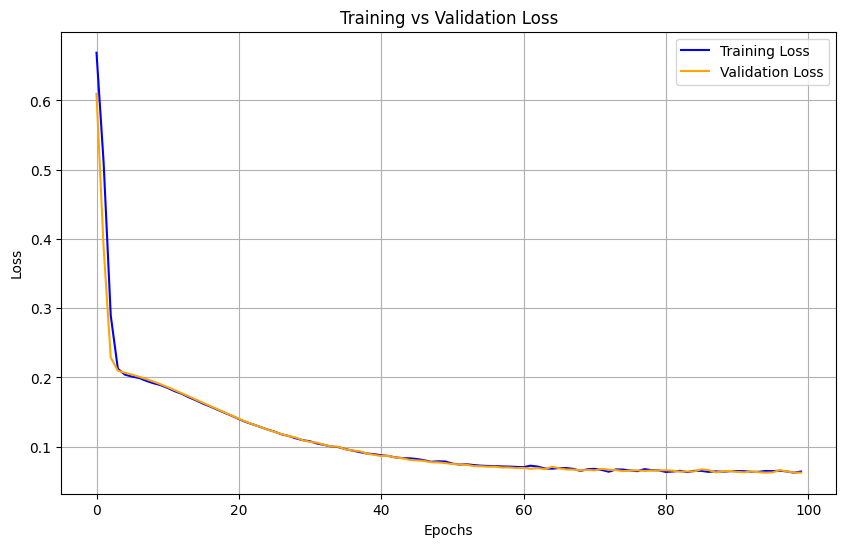

In [ ]:

patience = 10
num_epochs = 100
best_val_loss = float('inf')
patience_counter = 0 

# Lists to store loss values for plotting
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()

    # Average losses
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)

    # Append losses to lists for plotting
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model  
        patience_counter = 0  
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch + 1}")
            break  # Stop training if patience is exceeded

    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Evaluate on the test set
model.eval()
test_loss = 0.0
y_pred_list = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        test_loss += loss.item()
        y_pred_list.append((outputs >= 0.5).float())

test_loss /= len(test_loader)
y_pred = torch.cat(y_pred_list)
test_accuracy = accuracy_score(y_test.numpy(), y_pred.numpy())

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.0616, Test Accuracy: 0.9690


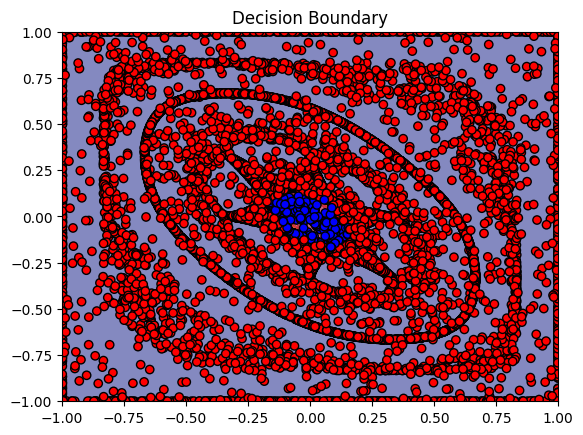

In [ ]:
# Decision boundary visualization
def plot_decision_boundary(model, X, y):
    x_min, x_max = -1.0, 1.0
    y_min, y_max = -1.0, 1.0
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    with torch.no_grad():
        zz = model(grid_tensor)
    zz = zz.reshape(xx.shape).numpy()

    plt.contourf(xx, yy, zz, levels=50, cmap='RdYlBu', alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.title('Decision Boundary')
    plt.show()


plot_decision_boundary(best_model, features, target)

<u>Insights for question 2b:</u><br>

My Best Loss: 0.0616<br>
My Best accuracy: 0.9690<br>
No. of Hidden Layers: 4<br>
No. of Neurons per layers: [ layer 1: 256, layer 2: 512, layer 3: 256, layer 4: 128 ] <br>
Activation Function: <b>Relu</b> for Hidden layers and <b>Sigmoid</b> for Output<br>
Optimizer: AdamW<br>